### IDs:
Insert yours IDs to the cell below

ID #1: 201639663

ID #2: 038198149


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [2]:
from sklearn.datasets import load_boston
from scipy import stats

X, y = load_boston(return_X_y=True)

print(X.shape)


(506, 13)



##### Q 1.1
Contains 506 samples. with 13 featuers. Each feature is a floating point.



##### Q 1.2
histogram and a boxplot of the nitric oxides concentration.

Text(0.5, 1.0, 'Histogram of nitric oxides concentration')

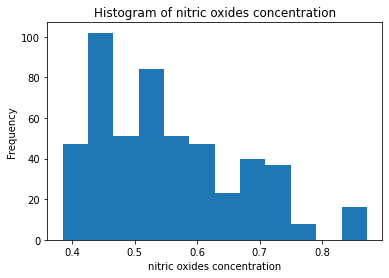

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(X[:,4], bins='auto')
plt.xlabel('nitric oxides concentration')
plt.ylabel('Frequency')
plt.title('Histogram of nitric oxides concentration')


{'whiskers': [<matplotlib.lines.Line2D at 0x22436dfa7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x22436dfaef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22436dfa668>],
 'medians': [<matplotlib.lines.Line2D at 0x22436e08630>],
 'fliers': [<matplotlib.lines.Line2D at 0x22436e089b0>],
 'means': []}

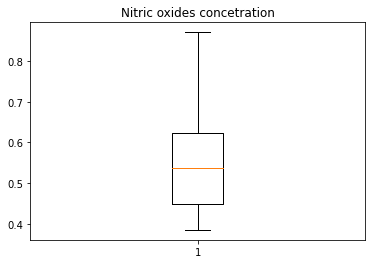

In [4]:
import pandas as pd
import seaborn as sns
fig1, ax1 = plt.subplots()
ax1.set_title('Nitric oxides concetration')
ax1.boxplot(X[:,4])

Accroding to the histogram and the IQR you can see that the greater amount of distribution mass is up to 0.5 values

##### Q 1.3 - 1.5



In [5]:
correlation_matrix = np.corrcoef(X.T)
# ignoring the correlation of a feature with itself

for i in range(correlation_matrix.shape[0]):
    correlation_matrix[i,i] = 0
    
idx_max = np.unravel_index(np.argmax(correlation_matrix, axis=None), correlation_matrix.shape)
correlation_matrix[idx_max[0], idx_max[1]]


0.9102281885331858

In [6]:
idx_min = np.unravel_index(np.argmin(correlation_matrix, axis=None), correlation_matrix.shape)
idx_min
# correlation_matrix[idx_min[0], idx_min[1]]

(4, 7)

there are some very coorelated features, for instance, the example above shows that the following attributes (unsurprisingly) are very coorelated. 

RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000

An interesting finding, is that the smallest correlation, i.e is closer to negative linear corralation than not, is between the following attributes:
nitric oxides concentration
weighted distances to five Boston employment centres

Which makes a lot of sense that as you get further from employment center the air polution will decrease

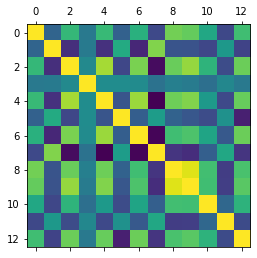

In [7]:
for i in range(correlation_matrix.shape[0]):
    correlation_matrix[i,i] = 1
    
corrMat =np.corrcoef(X.transpose())
plt.matshow(corrMat)
plt.show()

After looking at the confusion matrix, we found out that feature 3 ( Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
which a

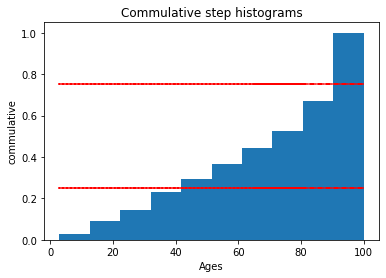

In [8]:
X[:,6]

    n, bins, patches = plt.hist(X[:,6], density=True, cumulative=True)
plt.title('Commulative step histograms')
plt.xlabel('Ages')
plt.ylabel('commulative')
horiz_line_data = np.array([0.25 for i in range(len(X[:,6]))])
plt.plot(X[:,6], horiz_line_data, 'r--') 

horiz_line_data = np.array([0.75 for i in range(len(X[:,6]))])
plt.plot(X[:,6], horiz_line_data, 'r--') 


#### Question 6

Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.
Intresting trend: Seems like the hypothesis 'As you get older you gain more commodities' is supported by the data.

Intresting trend: 



### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

Suppose that X,Y are independnt multivariate gaussians with expetency $\mu_1, \mu_2$ and 
$\Sigma_1, \Sigma_2$ covariance matrices. 
We know from class that Z = X + Y is also a gaussian multivariate since you can express it with the equation that defines gaussian multivarite. 

Now: 

$P(X,Y) = P(X)\cdot P(Y)$ and 

$P(X,Z) = P(X, X + Y) = P(X) \cdot P(X + Y | X) = P(X) \cdot P(Y) \Rightarrow P(X,Z) = P(X) \cdot P(Y)$


So X, Z are pairwise independent since the probability of $P(X,Z) = P(X) \cdot P(Y) $

But 
$P(X,Y,Z)$ is not pairwize independent since X,Y defines Z, so 
$P(X,Y,Z) \neq P(X)\cdot P(Y)\cdot P(Z)$


#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

There are $n\cdot m \cdot k$ possible triplets $(x_1,y_1,z_1)$ , so the number of parameters is $n\cdot m \cdot k -1$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Since they are independent then parameters of R.V by itself deinfes the joint distribution.

So the answer is $n + m + k$


#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

Under k different values we only need to learn $(n+m)\cdot k$

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

Method one is by solving 3 equations with 3 parameters - (w_1=0.123382307525707, w_3=0.626617692474293, mu_3 = 15.0894460299580)

In [28]:
from sympy import *
w_1,w_3,mu_3 = symbols('w_1 w_3 mu_3')

eq_1 = Eq(4*w_1 + 9*0.25+ mu_3 * w_3, 12.19884308211053 )
eq_2 = Eq((0.5**2)*w_1 + 0.25*(0.5**2) + w_3 * (1.5**2) + w_1 * ((4-12.19884308211053)**2) + 0.25 * ((9-12.19884308211053)**2) + w_3 * ((mu_3-12.19884308211053)**2),17.591027829588853)
eq_3 = Eq(w_1 + w_3, 0.75 )

print(solve([eq_1,eq_2,eq_3],[w_1,w_3,mu_3]))

[(-37.7794101648559, 38.5294101648559, 4.18035166000150), (0.123382307525707, 0.626617692474293, 15.0894460299580)]


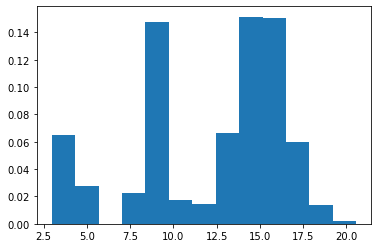

In [9]:
from numpy import genfromtxt
my_data = genfromtxt('GMD_2021.csv', delimiter=',')
my_data = my_data[:,1]
my_data

plt.hist(my_data, bins='auto',density=True)
plt.show()

We need to learn 
$\mu_3, w_1, w_2$

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

$\mu_3 = 15, w_1 = 0.15, w_3 = 0.6$ 

$\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

In [10]:
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", palette="muted", color_codes=True)


Text(0.5, 1.0, 'Third Gaussian')

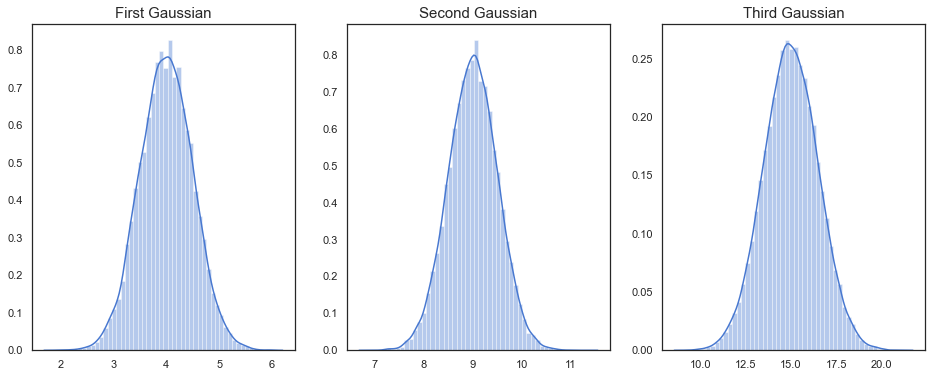

In [11]:
loc1, scale1, loc2, scale2, w1, w2 = 4, 0.5, 9, 0.5, 0.15, 0.25
loc3 = 15
scale3 = 1.5
w3 = 0.6
size1 = int(100000 * w1)
size2 = int(100000 * w2)
size3 = int(100000 * w3)

first_gaussian = stats.norm.rvs(loc=loc1, scale=scale1, size=size1)
second_gaussian = stats.norm.rvs(loc=loc2, scale=scale2, size=size2)
third_gaussian = stats.norm.rvs(loc=loc3, scale = scale3, size=size3)


fig, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.distplot(first_gaussian, ax=ax[0])
ax[0].set_title('First Gaussian', fontdict={'fontsize': 15})
sns.distplot(second_gaussian, ax=ax[1])
ax[1].set_title('Second Gaussian', fontdict={'fontsize': 15})

sns.distplot(third_gaussian, ax=ax[2])
ax[2].set_title('Third Gaussian', fontdict={'fontsize': 15})




Text(0.5, 1.0, 'GMM')

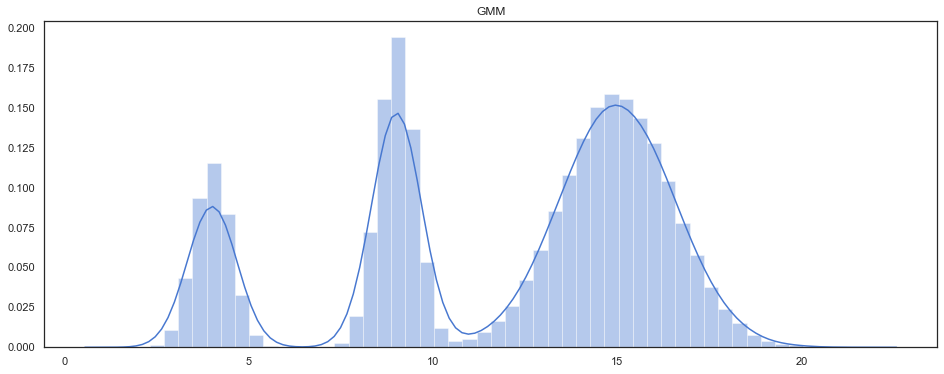

In [12]:
np.concatenate([first_gaussian, second_gaussian, third_gaussian]).shape

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
concated_arrays = np.concatenate([first_gaussian, second_gaussian, third_gaussian])
sns.distplot(concated_arrays, bins=50)
ax.set_title('GMM')

given 100k data points that we generated in order to plot the distribution bins of size 50 are helpful in order to understand the distribution. The x-axis was chosen to contain all the possible values of the GMM, which is the concatination of 3 gaussian distrinbutions . 
Thanksfully the nature of this distribution is that the possibility of an ourlier is extremely low, so we did not need to handle any 'run away' points that would have distrupt the plot.

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$



##### first method
Similar to what we have done in previouw section. Ill generate data with the same distribution has described above in advance according to $w_1, w_2, w_3$


Text(0.5, 1.0, 'GMM 3.C first way ')

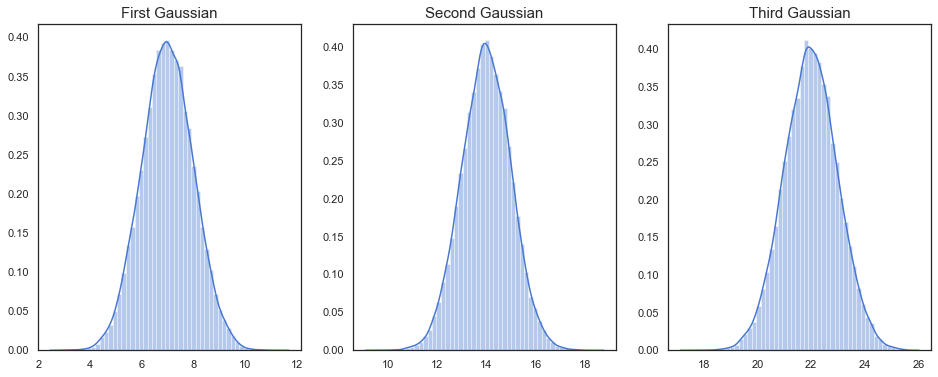

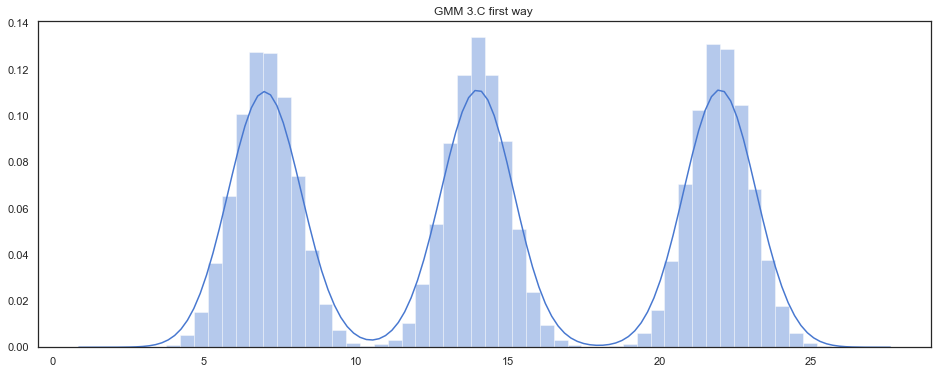

In [13]:
loc1_new, loc2_new, loc3_new = loc1 + 3, loc2 + 5, loc3 + 7
scale1_new  =scale2_new = scale3_new = 1


size1_new = int(100000 / 3)
size2_new = int(100000 / 3 )
size3_new = int(100000 / 3)

first_gaussian = stats.norm.rvs(loc=loc1_new, scale=scale1_new, size=size1_new)
second_gaussian = stats.norm.rvs(loc=loc2_new, scale=scale2_new, size=size2_new)
third_gaussian = stats.norm.rvs(loc=loc3_new, scale = scale3_new, size=size3_new)


fig, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.distplot(first_gaussian, ax=ax[0])
ax[0].set_title('First Gaussian', fontdict={'fontsize': 15})
sns.distplot(second_gaussian, ax=ax[1])
ax[1].set_title('Second Gaussian', fontdict={'fontsize': 15})

sns.distplot(third_gaussian, ax=ax[2])
ax[2].set_title('Third Gaussian', fontdict={'fontsize': 15})

np.concatenate([first_gaussian, second_gaussian, third_gaussian]).shape

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
concated_arrays = np.concatenate([first_gaussian, second_gaussian, third_gaussian])
sns.distplot(concated_arrays, bins=50)
ax.set_title('GMM 3.C first way ' )

The second way is to use the inverse function of the gaussian cdf , just like we saw in the recitation 


Text(0.5, 1.0, 'GMM 3.C second way - inverse CDF gaussian')

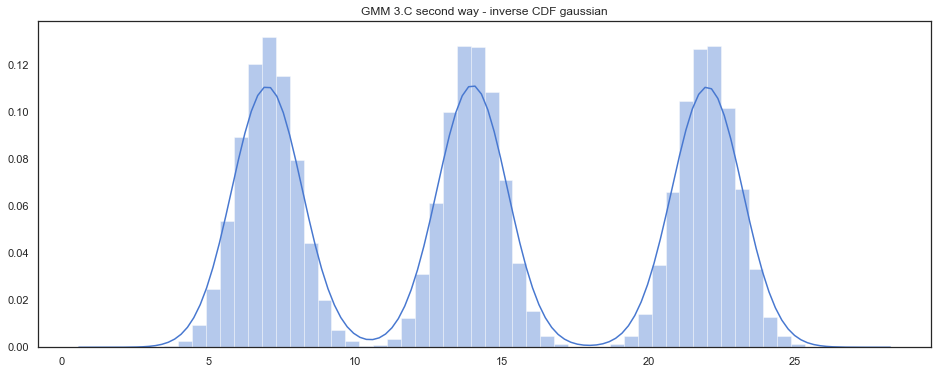

In [14]:
q1=np.random.rand(size1_new)
q2=np.random.rand(size2_new)
q3=np.random.rand(size3_new)
first_gaussian=stats.norm.ppf(q1,loc=loc1_new,scale=scale1_new)
second_gaussian=stats.norm.ppf(q2,loc=loc2_new,scale=scale2_new)
third_gaussian=stats.norm.ppf(q3,loc=loc3_new,scale=scale3_new)


np.concatenate([first_gaussian, second_gaussian, third_gaussian]).shape

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
concated_arrays = np.concatenate([first_gaussian, second_gaussian, third_gaussian])
sns.distplot(concated_arrays, bins=50)
ax.set_title('GMM 3.C second way - inverse CDF gaussian' )

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


Text(0.5, 1.0, '1000 points with inverse method')

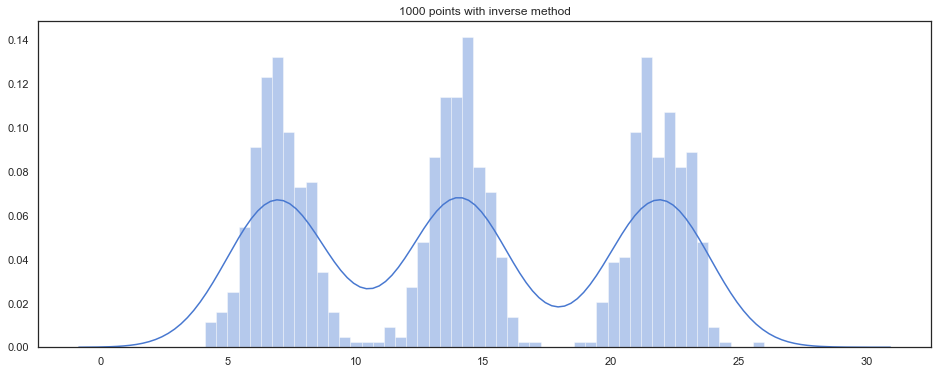

In [15]:
size_new = int(1000 / 3)
q1=np.random.rand(size_new)
q2=np.random.rand(size_new )
q3=np.random.rand(size_new + 1 )
first_gaussian=stats.norm.ppf(q1,loc=loc1_new,scale=scale1_new)
second_gaussian=stats.norm.ppf(q2,loc=loc2_new,scale=scale2_new)
third_gaussian=stats.norm.ppf(q3,loc=loc3_new,scale=scale3_new)


np.concatenate([first_gaussian, second_gaussian, third_gaussian]).shape

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
concated_arrays = np.concatenate([first_gaussian, second_gaussian, third_gaussian])
sns.distplot(concated_arrays, bins=50)
ax.set_title('1000 points with inverse method' )


#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [16]:
import numpy as np
from scipy.stats import norm
mu, sigma = 70000,30000
four_a =norm.cdf(50000, 70000, 30000)

tmp1 = norm.cdf(45000, 70000, 30000)
tmp2 = norm.cdf(65000, 70000, 30000)
four_b = tmp2-tmp1


#randomistan_salaries = norm.cdf(x=50000,loc=mu, scale=sigma, size=10000)
#randomistan_salaries.cdf(50000)

#### 4.A
What percent of people earn less than 50,000 RCU?
0.2524925375469229


In [17]:
print(four_a)

0.2524925375469229


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?
0.23148778642545326

In [18]:
print(four_b)

0.23148778642545326


#### 4.C
What percent of people earn more than 70,000 RCU?
0.5

In [19]:
four_c = 1- norm.cdf(70000, 70000, 30000)
print(four_c)


0.5


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?
9 to 10 people

In [20]:
four_d = (1- norm.cdf(140000, 70000, 30000)) * 1000
print(int(four_d) + 1)

10


#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

In [21]:
import numpy as np
from scipy.stats import norm
mu, sigma = 70000,30000
total_between_50k_and_70k = norm.cdf(70000, 70000, 30000) - norm.cdf(50000, 70000, 30000)
print(total_between_50k_and_70k)


0.2475074624530771


more than 10 groups will be the sum of probabilities for 
11, 12, 13,..., 20 group 

$y_{ij}$ - R.V salary of employee j in group i 

$X_i = \frac{1}{50} \cdot  \sum_{j=11}^{50}y_{ij}$ - R.V average salary of group i 

Lets find out what is $P(50000 \leq \{X_i
\} \leq 70000)$



$P(X_1,....X_11) + P(X_1,....X_{12})$






In [22]:
from scipy.stats import norm
from math import sqrt

sum = 0
for i in range(11,21):
    sum += (0.5 - norm.pdf((sqrt(50) / 30000) * -20000, 0, 1))**i

(0.5 - norm.pdf((sqrt(50) / 30000) * -20000, 0, 1))


0.49999403767256756

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

Given n different equiprobable coupen types, lets define the following R.V:
$X_i$ - to be the time it took to get a new coupon after we already received i-1 coupons. Therefore we get that for 
$T_n$  - the time to get N different coupons the expectency is:
$E[T_n] = E[\sum_{1}^{n}X_i] = \sum_{1}^{n}E[X_i] = \sum_{1}^{n} \frac{n}{n- i + 1}$

cause 

$X_i \sim Geom(p = (n -i + 1) / n) $
Therefore


In [23]:
def E_coupon_n(n):
    E_T_n = 0
    for i in range(n):
        current_E_i = n * 1/(i + 1)
        E_T_n += current_E_i
    return E_T_n

E_coupon_n(20)

71.95479314287363

#### 5.B
Write code to compute the exact value of $V(T_{N})$

Since each ${X_i}$ are iid we obtain that
$Var(X_1 + ... + X_n = V(X_1) + ... V(X_n) = 
\frac{1 - \frac{1}{2}}{\frac{1}{2^2}}+ ... + \frac{1 - \frac{1}{n - 1}}{\frac{1}{(n-1)^2}}$ 



In [24]:
def var_coupon_n(n):
    var_n = 0
    for i in range(n):
        idx = i + 1
        p_i = (n-idx + 1)/n
        nominator = 1 - (p_i)
        denominator = p_i**2
        var_n += nominator / denominator
    return var_n
var_coupon_n(20)      

566.5105044223355

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

We will calculate the probabiltiy of 
$P(T_{20}>40)$  by calculating the probability of 

$1 - P(T_{20}\leq40)$
with is 
$1 - ((P(T_{20}=20) + (P(T_{20}=21) + ... + (P(T_{20}=40)$

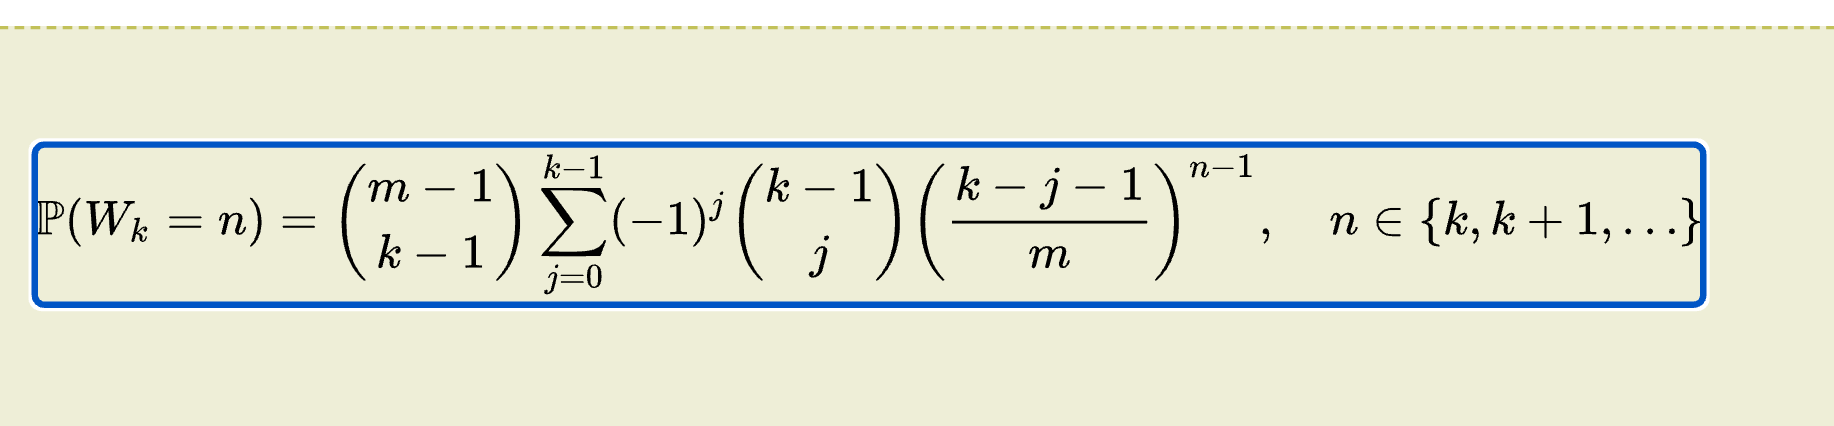

Write code to exactly compute  𝑃(𝑇20>40) 
We will calculate the probabiltiy of  𝑃(𝑇20>40)  by first calculating the number of partitions of a set of n labeled objects into k non-empty unlabeled subsets. (called also Stirling number of the second kind).
![title](2.png)
than, we will calculate $P(T_{20}>40)$ as
![title](1.png)
 

In [25]:
from scipy.special import comb
from scipy.special import factorial
def calcStirlingNumber(n,k):
    innerSum = 0
    for j in range(k+1):
        a = (-1) ** (k-j)
        b = comb(k , j)
        c = j ** n
        innerSum+= (a * b * c)
    res = innerSum/factorial(k)
    return res

def calcuate_T_n_bigger(n,k):
    stirlingNumber = calcStirlingNumber(n,k)
    a = factorial(k)/ (k ** n)
    res = 1 - (a*stirlingNumber)
    return res

print(calcuate_T_n_bigger(40,20))

0.9641122736925727


In [26]:
E_coupon_n(20)

71.95479314287363

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

$\mu = E(T_N)$

$\sigma = sqrt(V(T_N))$
we know by Chebyshev inequality that $P(\mu-b\sigma \leq T_N \leq\mu + b\sigma) >= 1- \frac{1}{b^2}$

we know that 
$\mu - b\sigma=K$

$b = \frac{\mu-K}{\sigma}$

we get $P(\mu-b\sigma \leq T_N \leq \mu + b\sigma) \geq 1- (\frac{\sigma}{\mu-K})^2$

$P(K\leq T_N) \geq (P(K \leq T_N \leq 2\mu - K))$

this leads us to $P(T_N \geq K) \geq 1- (\frac{\sigma}{\mu-K})^2$

we know that $P(T_N\geq K)= P(T_N\geq K+1)$

now we will use the methods we developed for a and b and put the numbers.
we will get that by Chebyshev the chances to get has to be bigger than 0.408, and we did get a result that supports that on C (0.96).
the chbyshev bound is not tight and doesnt help us a lot at least in this case.


In [27]:
import math
meu =E_coupon_n(20)
sigma= var_coupon_n(20)

P_T_20_Bigger_41 = 1-(math.sqrt(sigma)/(meu-41))**2
print(P_T_20_Bigger_41)


0.408775864690776
